# https://github.com/Frightera

## Kütüphaneler

In [ ]:
!pip install tensorflow-datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

## TensorFlow Datasets ve tf.data API

In [13]:
# Cifar100
train_ds, test_ds = tfds.load("cifar100", 
                              split = ["train", "test"],
                              as_supervised = True)

In [15]:
len(train_ds)

50000

In [ ]:
# item{"image"}, item{"label"}

In [9]:
for image, label in train_ds.take(1):
    print(image / 255)
    print(label)

tf.Tensor(
[[[0.5921569  0.6039216  0.5686275 ]
  [0.5647059  0.5764706  0.5294118 ]
  [0.5529412  0.56078434 0.5254902 ]
  ...
  [0.17254902 0.14901961 0.15294118]
  [0.4392157  0.39215687 0.3764706 ]
  [0.5686275  0.49803922 0.47058824]]

 [[0.6        0.6117647  0.5882353 ]
  [0.5529412  0.5647059  0.5294118 ]
  [0.54509807 0.5568628  0.53333336]
  ...
  [0.26666668 0.23137255 0.23137255]
  [0.5137255  0.44313726 0.41568628]
  [0.4745098  0.39607844 0.36862746]]

 [[0.6392157  0.64705884 0.6313726 ]
  [0.5882353  0.6        0.5686275 ]
  [0.5764706  0.58431375 0.5647059 ]
  ...
  [0.29411766 0.25882354 0.23529412]
  [0.39607844 0.3372549  0.3019608 ]
  [0.3254902  0.3019608  0.28627452]]

 ...

 [[0.5882353  0.5882353  0.63529414]
  [0.2        0.20392157 0.2627451 ]
  [0.18039216 0.16470589 0.21960784]
  ...
  [0.23529412 0.23137255 0.1882353 ]
  [0.2784314  0.28627452 0.21960784]
  [0.22745098 0.24313726 0.17254902]]

 [[0.57254905 0.61960787 0.65882355]
  [0.36078432 0.41568628 0

In [16]:
train_ds = train_ds.shuffle(len(train_ds)).batch(128)
test_ds = test_ds.shuffle(len(test_ds)).batch(128)

In [18]:
50000//128

390

In [20]:
50000-390*128

80

In [17]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [12]:
for image, label in train_ds.take(1):
    print(image / 255)
    print(label)

tf.Tensor(
[[[[0.5921569  0.6039216  0.5686275 ]
   [0.5647059  0.5764706  0.5294118 ]
   [0.5529412  0.56078434 0.5254902 ]
   ...
   [0.17254902 0.14901961 0.15294118]
   [0.4392157  0.39215687 0.3764706 ]
   [0.5686275  0.49803922 0.47058824]]

  [[0.6        0.6117647  0.5882353 ]
   [0.5529412  0.5647059  0.5294118 ]
   [0.54509807 0.5568628  0.53333336]
   ...
   [0.26666668 0.23137255 0.23137255]
   [0.5137255  0.44313726 0.41568628]
   [0.4745098  0.39607844 0.36862746]]

  [[0.6392157  0.64705884 0.6313726 ]
   [0.5882353  0.6        0.5686275 ]
   [0.5764706  0.58431375 0.5647059 ]
   ...
   [0.29411766 0.25882354 0.23529412]
   [0.39607844 0.3372549  0.3019608 ]
   [0.3254902  0.3019608  0.28627452]]

  ...

  [[0.5882353  0.5882353  0.63529414]
   [0.2        0.20392157 0.2627451 ]
   [0.18039216 0.16470589 0.21960784]
   ...
   [0.23529412 0.23137255 0.1882353 ]
   [0.2784314  0.28627452 0.21960784]
   [0.22745098 0.24313726 0.17254902]]

  [[0.57254905 0.61960787 0.658823

In [21]:
def normalize_images(image, label):
    # Sadece TF fonksiyon ve metotları kullanılmalı.
    # tf.numpy_function -- hariç --
    
    # Resimleri normalize et ve float32'ye
    # cast et.
    image = tf.cast(image / 255, tf.float32)

    label = tf.one_hot(label, depth=100)

    return image, label

# shuffle -> batch -> map -> prefetch
train_ds = train_ds.map(normalize_images).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize_images).prefetch(tf.data.AUTOTUNE)

## ANN Modeli

In [26]:
# Kerasta 3 tür API bulunur (model oluşturmak için):
# -> Sequential
# -> Functional API
# -> Subclassing 

# Datasetin içerisinde resimler - labellar var
# Resimler --> (None, 32, 32, 3)
# Labellar --> (None, 100)

ann_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((32, 32, 3)),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),

    # multi-class classification için --> softmax
    tf.keras.layers.Dense(100, activation="softmax")
])

ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 100)               12900     
                                                                 
Total params: 406,244
Trainable params: 406,244
Non-trainable params: 0
_________________________________________________________________


In [28]:
ann_model.compile(optimizer="adam", loss="categorical_crossentropy",
                  metrics = ["acc"])

In [29]:
ann_model.fit(train_ds, epochs=10)

Epoch 1/10
391/391 [==============================] - 7s 3ms/step - loss: 4.3764 - acc: 0.0382
Epoch 2/10
391/391 [==============================] - 2s 3ms/step - loss: 4.0174 - acc: 0.0804
Epoch 3/10
391/391 [==============================] - 2s 3ms/step - loss: 3.9142 - acc: 0.0968
Epoch 4/10
391/391 [==============================] - 2s 3ms/step - loss: 3.8536 - acc: 0.1102
Epoch 5/10
391/391 [==============================] - 2s 3ms/step - loss: 3.8176 - acc: 0.1149
Epoch 6/10
391/391 [==============================] - 2s 3ms/step - loss: 3.7880 - acc: 0.1198
Epoch 7/10
391/391 [==============================] - 2s 3ms/step - loss: 3.7574 - acc: 0.1260
Epoch 8/10
391/391 [==============================] - 2s 3ms/step - loss: 3.7428 - acc: 0.1308
Epoch 9/10
391/391 [==============================] - 2s 3ms/step - loss: 3.7252 - acc: 0.1329
Epoch 10/10
391/391 [==============================] - 2s 3ms/step - loss: 3.7074 - acc: 0.1366


In [30]:
ann_model.evaluate(test_ds)

79/79 [==============================] - 1s 3ms/step - loss: 3.7258 - acc: 0.1390


[3.7257816791534424, 0.13899999856948853]

## CNN Modeli
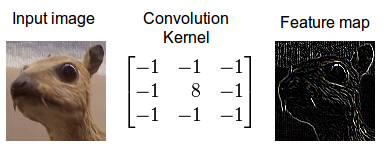



Source: https://developer.nvidia.com/discover/convolution

In [31]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((32, 32, 3)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(100, activation="softmax")

])

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                      

In [33]:
6 * 6 * 64

2304

In [32]:
cnn_model.compile(optimizer="adam", 
                  loss="categorical_crossentropy",
                  metrics = ["acc"])

cnn_model.fit(train_ds, epochs=20)

Epoch 1/20
391/391 [==============================] - 8s 4ms/step - loss: 4.2820 - acc: 0.0486
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 4.0171 - acc: 0.0940
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 3.8688 - acc: 0.1181
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 3.7938 - acc: 0.1296
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 3.7223 - acc: 0.1434
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 3.6609 - acc: 0.1548
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 3.5939 - acc: 0.1676
Epoch 8/20
391/391 [==============================] - 2s 4ms/step - loss: 3.5386 - acc: 0.1760
Epoch 9/20
391/391 [==============================] - 2s 4ms/step - loss: 3.4867 - acc: 0.1858
Epoch 10/20
391/391 [==============================] - 2s 4ms/step - loss: 3.4412 - acc: 0.1923
Epoch 11/20
391/391 [============================

In [34]:
cnn_model.evaluate(test_ds)

79/79 [==============================] - 0s 3ms/step - loss: 3.2380 - acc: 0.2320


[3.2380197048187256, 0.23199999332427979]

## Data Augmentation Layerları

In [35]:
import matplotlib.pyplot as plt

In [41]:
for images, labels in train_ds.take(1):
    print(images.shape)
    first_image = images[0]

(128, 32, 32, 3)


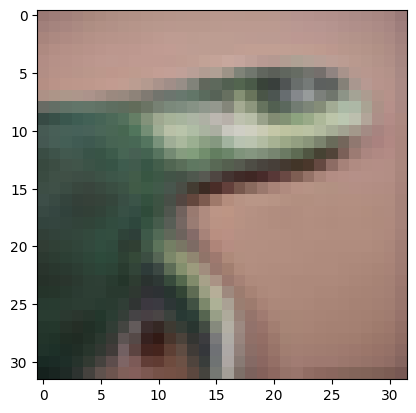

In [42]:
plt.imshow(first_image)

In [57]:
transformed_image = tf.keras.layers.RandomZoom(
                            height_factor=1, 
                            width_factor=1)(first_image)

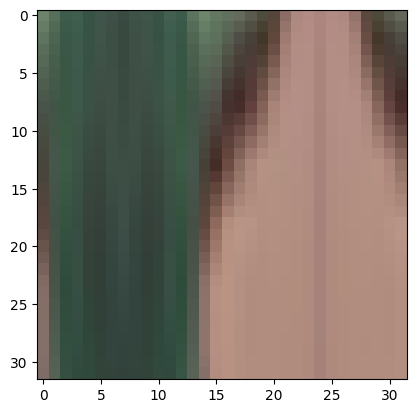

In [58]:
plt.imshow(transformed_image)

In [52]:
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.5, 0.2),
    tf.keras.layers.RandomBrightness(factor = .25),
])

## CNN + Data Augmentation

In [59]:
cnn_model_augment = tf.keras.Sequential([
    tf.keras.layers.InputLayer((32, 32, 3)),
    
    data_augmentation_layers,
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(100, activation="softmax")

])

cnn_model_augment.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 64)              

In [60]:
cnn_model_augment.compile(optimizer="adam", 
                  loss="categorical_crossentropy",
                  metrics = ["acc"])

cnn_model_augment.fit(train_ds, epochs=35)

Epoch 1/35
391/391 [==============================] - 4s 5ms/step - loss: 4.8552 - acc: 0.0091
Epoch 2/35
391/391 [==============================] - 2s 5ms/step - loss: 4.6305 - acc: 0.0094
Epoch 3/35
391/391 [==============================] - 2s 5ms/step - loss: 4.6218 - acc: 0.0111
Epoch 4/35
391/391 [==============================] - 2s 5ms/step - loss: 4.6145 - acc: 0.0119
Epoch 5/35
391/391 [==============================] - 2s 5ms/step - loss: 4.6120 - acc: 0.0115
Epoch 6/35
391/391 [==============================] - 2s 5ms/step - loss: 4.6101 - acc: 0.0111
Epoch 7/35
391/391 [==============================] - 2s 5ms/step - loss: 4.6067 - acc: 0.0127
Epoch 8/35
391/391 [==============================] - 2s 5ms/step - loss: 4.6041 - acc: 0.0128
Epoch 9/35
391/391 [==============================] - 2s 4ms/step - loss: 4.6014 - acc: 0.0133
Epoch 10/35
391/391 [==============================] - 2s 4ms/step - loss: 4.6023 - acc: 0.0139
Epoch 11/35
391/391 [============================